In [27]:
import numpy as np
import scipy.stats
import pickle
import time

startTime=time.time()
# Load the saved ARIMA model from the file
with open('mean_Throughput_model.pkl', 'rb') as file:
    mean_loaded_model = pickle.load(file)
with open('std_Throughput_model.pkl', 'rb') as file:
    std_loaded_model = pickle.load(file)



In [30]:
minute=4
fiveSecondFromMinute=minute*12
# Make predictions using the loaded model
prediction_time=int(time.time()-startTime)
print(prediction_time)
mean_pred = mean_loaded_model.predict(prediction_time,prediction_time+fiveSecondFromMinute, typ="levels")
std_dev_pred = std_loaded_model.predict(prediction_time, prediction_time+fiveSecondFromMinute, typ="levels")

# Define threshold and time interval
threshold = 3


# Calculate cumulative probabilities for each time step within the interval
cumulative_probabilities = []
for mean, std_dev in zip(mean_pred[:], std_dev_pred[:]):
    probability = scipy.stats.norm.cdf(threshold, loc=mean, scale=std_dev)
    cumulative_probabilities.append(probability)

print(cumulative_probabilities)
cumulative_probabilities=1-np.array(cumulative_probabilities)
cumulative_probabilities = cumulative_probabilities[~np.isnan(cumulative_probabilities)]

# Combine probabilities (e.g., take the maximum)
combined_probability =1- np.prod(cumulative_probabilities)
combined_probability_max=np.max(1-cumulative_probabilities)
print(f"Probability of subceeding 1 time '{threshold} MB/s' of throughput in {minute} minute: {combined_probability*100:.6f}%")
print(f"Max instant Probability of subceeding '{threshold} MB/s' of throughput in {minute} minute: {combined_probability_max*100:.6f}%")

6
[0.028392411309675424, 0.02750967672527878, 0.02845398917253942, 0.028276804060969368, 0.02677702865515195, 0.026470273349314958, 0.025682721062256705, 0.02752578498635584, 0.028556551979796174, 0.029767288411258096, 0.03199200646812604, 0.0339178634156289, 0.0359646055315896, 0.0378245306397587, 0.039615505695773545, 0.04141381747836761, 0.043229103070254224, 0.04509081390150311, 0.04697099169682003, 0.04886853099521413, 0.05078237351956212, 0.0538971490449924, 0.057320709126521645, 0.06067200199660892, 0.064076619129839, 0.06834911551944228, 0.07236124600645676, 0.07647037689062994, 0.08060687961811991, 0.08465826808496058, 0.0887284419291206, 0.09281440840943694, 0.09691347283415341, 0.10102321444448353, 0.10514146412485725, 0.1094212363325947, 0.11064987816407312, 0.1158739520466393, 0.12019073145628922, 0.12499400637982472, 0.12956874898798998, 0.13362697771351978, 0.13793593207739457, 0.14104375062022306, 0.142060693254639, 0.1443410344273794, 0.14534693591057946, 0.14505235479

Text(0, 0.5, 'Througput (MB/s)')

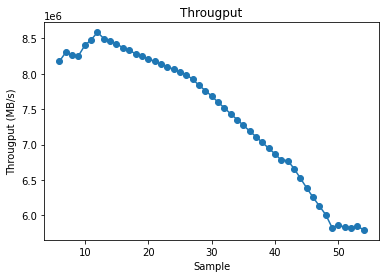

In [31]:
from matplotlib import pyplot as plt


plt.plot(mean_pred, marker='o')
plt.title('Througput')
plt.xlabel('Sample')
plt.ylabel('Througput (MB/s)')